##번역가는 대화에도 능하다

개발 환경
<br/>데이터 정보
<br/>데이터 탐색


데이터 전처리
<br/>문장 길이 범위
<br/>중복 제거
<br/>리스트 변환
<br/>정제
<br/>토큰화

Data Augmentation
<br/>Word2Vec
<br/>Glove
<br/>FastText
<br/>Lexical Substitution
<br/>Ascending Order
<br/>File I/O

Data Vectorization

모델 구성
<br/>Transformer
<br/>Learning Rate Schedule
<br/>Loss Function
<br/>Train Step
<br/>Evaluation

BLEU Score
<br/>Hyperparameter
<br/>First Model
<br/>Second Model
<br/>최종 모델
<br/>결론
<br/>참고문헌

#개발 환경

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

한글 폰트를 설치한다.
<br/>혹시 깨짐현상이 발생하는 경우 런타임을 다시 시작하고 matplotlib 모듈을 실행하면 한글이 출력된다.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

In [ ]:
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

Google Colab에 한글 폰트가 설치되어 있는지 확인한다.

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

PCA Scatter Plot을 확인하기 위해 한국어를 지원하는 폰트로 변경한다.

In [ ]:
!pip install fasttext

In [ ]:
import os
# install konlpy, jdk, JPype
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

# install mecab-ko
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
!tar zxfv mecab-0.996-ko-0.9.2.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.2')
!./configure
!make
!make check
!make install

# install mecab-ko-dic
!apt-get install automake
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
!tar -zxvf mecab-ko-dic-2.1.1-20180720.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.1.1-20180720')
!./autogen.sh
!./configure
!make
!make install

# install mecab-python
os.chdir('/content')
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')
!python3 setup.py build
!python3 setup.py install

In [2]:
import os
import csv
import pickle
import math
import random
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import sequence
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [4]:
from tqdm.notebook import tqdm
from IPython.display import HTML
from IPython.display import Image

In [5]:
import re
from konlpy.tag import Mecab

In [8]:
import gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [9]:
import fasttext
import fasttext.util

In [6]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [12]:
library_name = ['numpy=', 'pandas=', 'tensorflow=', 'keras=', 'scikit-learn=', 'tqdm=', 'matplotlib=',
                'regex=', 'gensim=', 'nltk=', 'konlpy=', 'fasttext=', 'pickle=', 'nltk=']
library_version = []
f = open('/content/drive/MyDrive/lms/library_version.txt', 'r')
line = f.readline()
while True:
    line = f.readline()
    if not line:
      break
    for i in library_name:
      if i in line:
        library_version.append(line)
        library_version.append('    ')

f.close()

import sys
print(sys.version)
print()

for i in range(0, len(library_version) - 1, 6):
  print(str(library_version[i : i+6]).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='') 
  if i % 6 == 0:
    print()

for i in range(len(library_version) - 1):
  if (i-1) % 6 == 0 and i == len(library_version) - 6:
    print(str(library_version[-1]).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='')

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

cloudpickle==1.3.0      fasttext==0.9.2      gensim==3.6.0     
keras==2.8.0      konlpy==0.6.0      matplotlib==3.2.2     
nltk==3.7      nltk==3.7      numpy==1.21.6     
pandas==1.3.5      regex==2022.6.2      scikit-learn==1.0.2     
sklearn-pandas==1.8.0      tensorflow==2.8.2+zzzcolab20220719082949      tqdm==4.64.0     


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다

#데이터 정보

[Chatbot data for Korean v1.0](https://github.com/songys/Chatbot_data)

다음 카페 [사랑보다 아름다운 실연](http://cafe116.daum.net/_c21_/home?grpid=1bld)에서 자주 나오는 이야기들을 참고하여 제작한 데이터셋이다.
<br/>챗봇 트레이닝용 문답 페어가 11,876개이다.
<br/>일상다반사 0, 이별(부정) 1, 사랑(긍정) 2로 레이블링했다.
<br/>읽어 온 데이터의 질문과 답변을 각각 questions, answers 변수에 나눠서 저장한다.

In [147]:
chatbot_data = pd.read_table('/content/drive/MyDrive/lms/transformer_chatbot/ChatbotData.csv')
chatbot_data.head()

,"Q,A,label"
0,"12시 땡!,하루가 또 가네요.,0"
1,"1지망 학교 떨어졌어,위로해 드립니다.,0"
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0"
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0"
4,"PPL 심하네,눈살이 찌푸려지죠.,0"


In [148]:
chatbot_qna = chatbot_data["Q,A,label"].str.split(',')
chatbot_qna = chatbot_qna.apply(lambda x: pd.Series(x))
chatbot_qna = chatbot_qna.loc[:, [0, 1]]
chatbot_qna.columns = ['question', 'answer']

In [149]:
chatbot_qna

,question,answer
0,12시 땡!,하루가 또 가네요.
1,1지망 학교 떨어졌어,위로해 드립니다.
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.
4,PPL 심하네,눈살이 찌푸려지죠.
...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.
11820,흑기사 해주는 짝남.,설렜겠어요.
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.


#데이터 탐색

Question Min Length : 1
Question Max Length : 56
Question Mean Length : 12.847162310750232
Answer Min Length : 0
Answer Max Length : 69
Answer Mean Length : 14.927091262792862



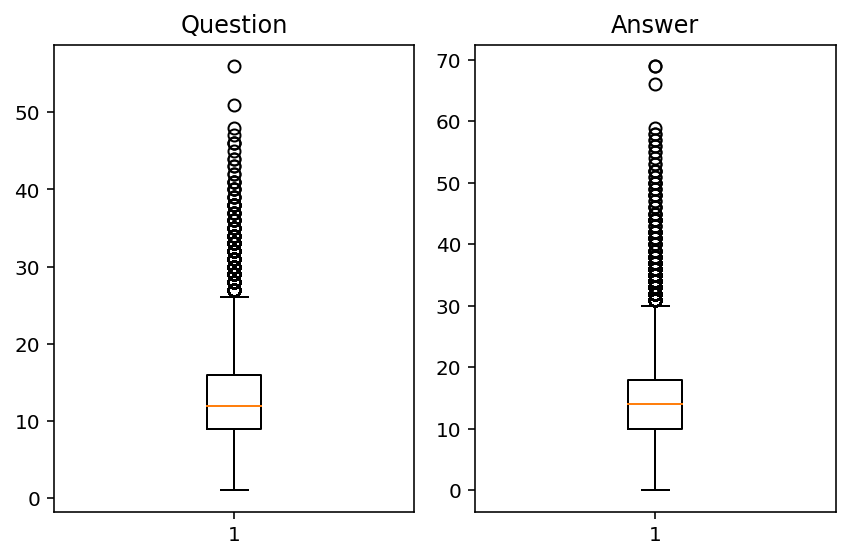

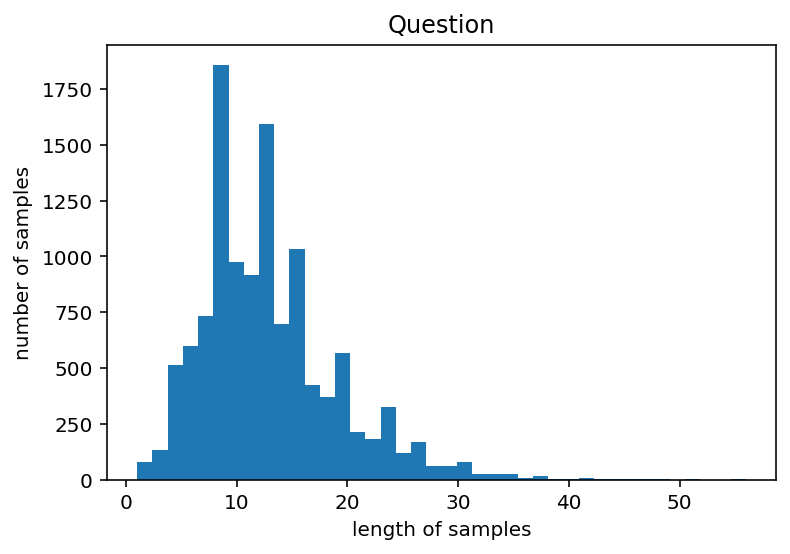

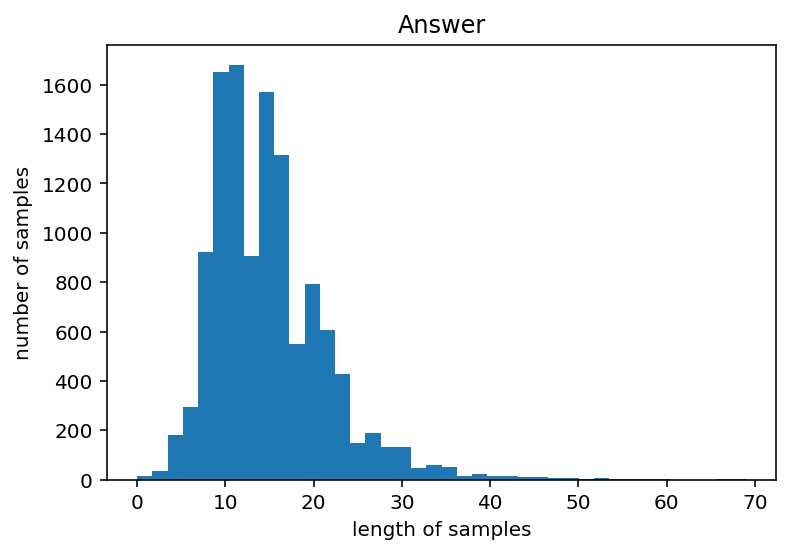

In [138]:
question = []
for i in range(len(chatbot_qna['question'])):
  question.append(chatbot_qna['question'][i])

answer = []
for i in range(len(chatbot_qna['answer'])):
  answer.append(chatbot_qna['answer'][i])  

num_question = np.array([len(i) for i in question])
num_answer = np.array([len(i) for i in answer])

print('Question Min Length : {}'.format(np.min(num_question)))
print('Question Max Length : {}'.format(np.max(num_question)))
print('Question Mean Length : {}'.format(np.mean(num_question)))
print('Answer Min Length : {}'.format(np.min(num_answer)))
print('Answer Max Length : {}'.format(np.max(num_answer)))
print('Answer Mean Length : {}'.format(np.mean(num_answer)))
print()
plt.subplot(1,2,1)
plt.boxplot(num_question)
plt.title('Question')
plt.subplot(1,2,2)
plt.boxplot(num_answer)
plt.title('Answer')
plt.tight_layout()
plt.show()
print()
plt.title('Question')
plt.hist(num_question, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
print()
plt.title('Answer')
plt.hist(num_answer, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [139]:
text_min_len = 2
text_max_len = 40
num_part_question = np.array([len(i) for i in question if text_min_len <= len(i) <= text_max_len])
num_part_answer = np.array([len(i) for i in question if text_min_len <= len(i) <= text_max_len])

print('Text Min Length : ', text_min_len)
print('Text Max Length : ', text_max_len)
print('{:.2f}% of all sentences are within the setting.'.format(100 * len(num_part_answer + num_part_question)/ len(num_answer + num_question)))

Text Min Length :  2
Text Max Length :  40
99.77% of all sentences are within the setting.


적절한 최대 문장 길이를 40으로 지정한다.

#데이터 전처리

##문장 길이 범위

In [150]:
text_min_len = 2
text_max_len = 40

chatbot_qna['index'] = chatbot_qna.index
for i in range(len(chatbot_qna)):
  if len(chatbot_qna['question'][i]) <= text_min_len or len(chatbot_qna['question'][i]) >= text_max_len \
  or len(chatbot_qna['answer'][i]) <= text_min_len or len(chatbot_qna['answer'][i]) >= text_max_len:
  
    chatbot_qna = chatbot_qna[chatbot_qna['index'] != i]
    
del chatbot_qna['index']

##중복 제거

In [152]:
chatbot_qna = chatbot_qna.drop_duplicates(['question'])
chatbot_qna = chatbot_qna.drop_duplicates(['answer'])
chatbot_qna = chatbot_qna.reset_index()

del chatbot_qna['index']

##리스트 변환

In [186]:
question_raw = []
for i in range(len(chatbot_qna['question'])):
  question_raw.append(chatbot_qna['question'][i])

print("Data Size :", len(question_raw))
print()
print("Example")
for question_sen in question_raw[:250][::50]: print("", question_sen)

Data Size : 7607

Example
 12시 땡!
 같이 수영장 가기로 했어
 결정적인 물증이 없어
 공부 왜 해야 돼?
 그 사람이 나 좋아해줬으면 좋겠다


In [187]:
answer_raw = []
for i in range(len(chatbot_qna['answer'])):
  answer_raw.append(chatbot_qna['answer'][i])

print("Data Size :", len(answer_raw))
print()
print("Example")
for answer_sen in answer_raw[:250][::50]: print("", answer_sen)

Data Size : 7607

Example
 하루가 또 가네요.
 즐거운 시간 보내고 오세요!
 안타깝네요. 증거를 지금이라도 모아봐요.
 공부하면 더 많은 선택을 할 수 있죠.
 저도 간절히 기도 할게요.


##정제

In [170]:
def preprocess_sentence(sentence_list):
    
    corpus = []
    for sentence in sentence_list:
        sentence = sentence.lower()
        sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
        sentence = re.sub(r'[" "]+', " ", sentence)
        sentence = re.sub(r"[^0-9ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z?.!,]+", " ", sentence)
        sentence = sentence.strip()
        corpus.append(sentence)
        
    return corpus

In [225]:
preprocess_sentence('+& 카드 망가졌어]')

['', '', '', '카', '드', '', '망', '가', '졌', '어', '']

영문자의 경우 소문자로 변환한다.
<br/>영문자, 한글, 숫자, 주요 문장부호( ? . ! , )를 남기고 나머지 문자를 제외한다.

##토큰화

In [167]:
def mecab_tokenizer(sentence_list):
  
    corpus = []
    mecab = Mecab()
    for sentence in sentence_list:
      token = mecab.morphs(sentence)
      corpus.append(token)

    return corpus

MeCab을 활용하여 토큰화한다.

In [171]:
def build_corpus(question_raw, answer_raw):
  
    question = preprocess_sentence(question_raw)
    answer = preprocess_sentence(answer_raw)
    que_corpus = mecab_tokenizer(question)
    ans_corpus = mecab_tokenizer(answer)

    return que_corpus, ans_corpus, question, answer

In [172]:
que_corpus, ans_corpus, question, answer = build_corpus(question_raw, answer_raw)

In [173]:
print("Question Sentence")
print(question[0], "\n")
print("Question Morpheme Token")
print(que_corpus[0], "\n\n")
print("Answer Sentence")
print(answer[0], "\n")
print("Answer Morpheme Token")
print(ans_corpus[0], "\n")

Question Sentence
12시 땡 ! 

Question Morpheme Token
['12', '시', '땡', '!'] 


Answer Sentence
하루가 또 가네요 . 

Answer Morpheme Token
['하루', '가', '또', '가', '네요', '.'] 



In [174]:
print("Data Size : ({}, {})".format(len(que_corpus), len(ans_corpus)))

Data Size : (7607, 7607)


#Data Augmentation

##Word2Vec

[Pre-trained word vectors of 30+ languages](https://github.com/Kyubyong/wordvectors)

한국어로 사전 훈련된 단어 수준의 Word2Vec Embedding 모델이다.

In [175]:
word2vec_path = '/content/drive/MyDrive/lms/transformer_chatbot/embedding_model/word2vec.bin'
word2vec_model = Word2Vec.load(word2vec_path)

In [176]:
word2vec_model.wv.most_similar("길")

[('구불구불', 0.4876348078250885),
 ('가늘', 0.4853244125843048),
 ('길다랗', 0.4841133952140808),
 ('둥글', 0.4518604874610901),
 ('짧', 0.4475528597831726),
 ('기다랗', 0.4351239502429962),
 ('푸르', 0.4280202388763428),
 ('산길', 0.4273521304130554),
 ('길쭉', 0.42183613777160645),
 ('길이', 0.42086976766586304)]

In [194]:
for i in range(0, 250, 50):
  if i > 0:
    print()
  print("from : ", " ".join(que_corpus[i]))
  print("to : ", end='')
  for j in range(len(que_corpus[i])):
    try:
      result = word2vec_model.wv.most_similar(que_corpus[i][j])[0][0]
      print(result, end=' ')
    except KeyError: 
      print(que_corpus[i][j], end=' ')
  print()

from :  12 시 땡 !
to : 12 시가 끗 캐치 

from :  같이 수영장 가 기 로 했 어
to : 같 축구장 놀드 적기 로서 했 어서 

from :  결정 적 인 물증 이 없 어
to : 의결 의식적 인은 물증 그러 없었 어서 

from :  공부 왜 해야 돼 ?
to : 가르치 과연 해야 돼 ... 

from :  그 사람 이 나 좋 아 해 줬 으면 좋 겠 다
to : 그녀 젊은이 그러 나의 괜찮 아서 해의 줬 다면 괜찮 싶 으며 


In [ ]:
def display_pca_scatterplot(model, title, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(8,8))
    plt.title(title)
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

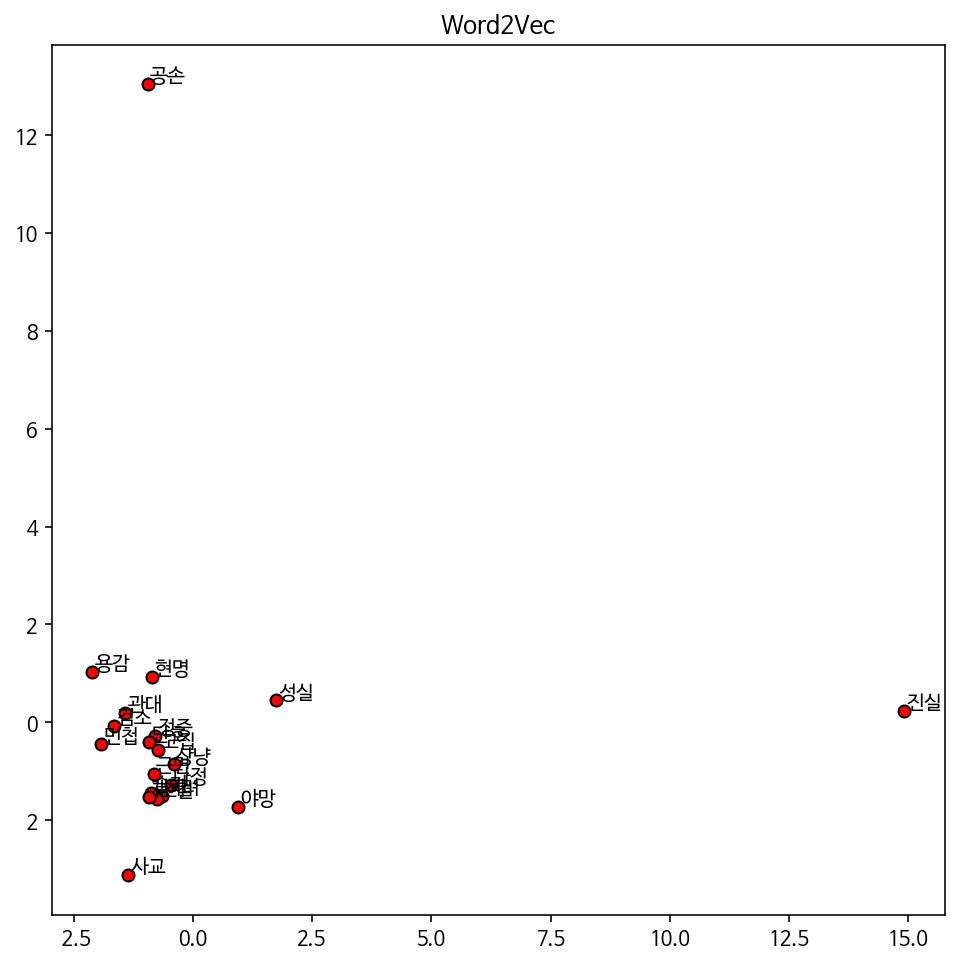

In [ ]:
display_pca_scatterplot(word2vec_model, "Word2Vec",
                        ['민첩', '야망', '용감', '공손', 
                         '정중', '근면', '성실', '단호', 
                         '관대', '상냥', '다정', '진실', 
                         '사교', '고집', '사려', '검소', 
                         '고결', '현명', '슬기', '재치'])

##Glove

[Pre-trained word embedding vector](https://ratsgo.github.io/embedding/downloaddata.html)

학습이 완료된 단어 수준 임베딩 모델이다.
<br/>FastText-Jamo를 제외한 모든 임베딩은 한국어 위키백과, KorQuAD, 네이버 영화 말뭉치를 은전한닢(mecab)으로
<br/>형태소 분석한 말뭉치로 학습됐다.

In [ ]:
glove2word2vec(glove_input_file='/content/drive/MyDrive/lms/transformer_chatbot/embedding_model/glove.txt',
               word2vec_output_file='/content/drive/MyDrive/lms/transformer_chatbot/embedding_model/gensim_glove_vectors.txt')

In [180]:
glove_path = '/content/drive/MyDrive/lms/transformer_chatbot/embedding_model/gensim_glove_vectors.txt'
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)

In [181]:
glove_model.most_similar("길")

[('삼', 0.7340559959411621),
 ('교차로', 0.7128734588623047),
 ('거리', 0.7117969989776611),
 ('고개', 0.6495471596717834),
 ('교', 0.6426589488983154),
 ('로', 0.6424239277839661),
 ('마을', 0.6404488682746887),
 ('서', 0.6330164670944214),
 ('앞', 0.6325525641441345),
 ('입구', 0.6304036378860474)]

In [195]:
for i in range(0, 250, 50):
  if i > 0:
    print()
  print("from : ", " ".join(que_corpus[i]))
  print("to : ", end='')
  for j in range(len(que_corpus[i])):
    try:
      result = glove_model.most_similar(que_corpus[i][j])[0][0]
      print(result, end=' ')
    except KeyError: 
      print(que_corpus[i][j], end=' ')
  print()

from :  12 시 땡 !
to : 12 현 땡땡 세요 

from :  같이 수영장 가 기 로 했 어
to : 같 실내 는 게 되 였 되 

from :  결정 적 인 물증 이 없 어
to : 최종 이러 의 못한다는 은 않 되 

from :  공부 왜 해야 돼 ?
to : 배웠 뭐 할 됐 왜 

from :  그 사람 이 나 좋 아 해 줬 으면 좋 겠 다
to : 자신 살 은 같 잘 았 하 가져다 어야 잘 싶 었 


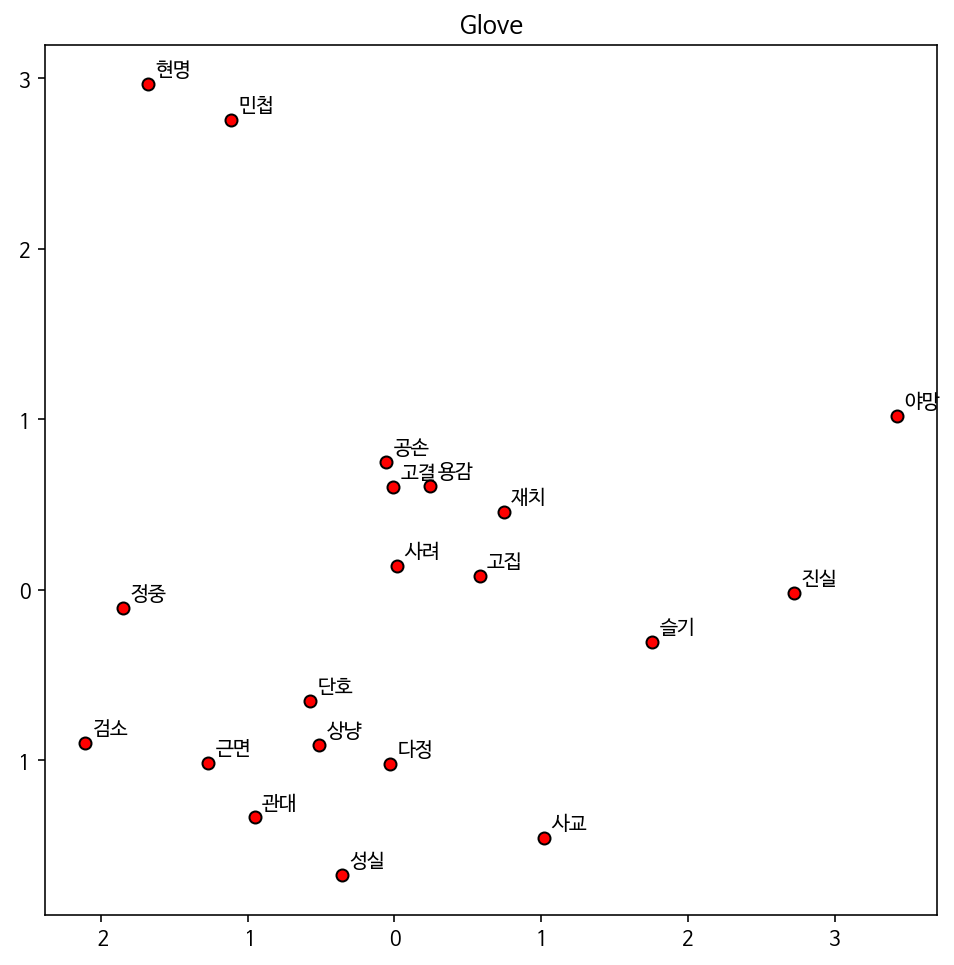

In [ ]:
display_pca_scatterplot(glove_model, "Glove",
                        ['민첩', '야망', '용감', '공손', 
                         '정중', '근면', '성실', '단호', 
                         '관대', '상냥', '다정', '진실', 
                         '사교', '고집', '사려', '검소', 
                         '고결', '현명', '슬기', '재치'])

##FastText

[Word vectors for 157 languages](https://fasttext.cc/docs/en/crawl-vectors.html)

FastText 공식 사이트의 사전학습 모델 파일 용량이 4.2GB에 달하여 작업 시간이 오래 걸린다.
<br/>따라서 용량이 가벼운 모델 파일을 대신 사용한다.

[Pre-trained word embedding vector](https://ratsgo.github.io/embedding/downloaddata.html)

학습이 완료된 단어 수준 임베딩 모델이다.
<br/>FastText-Jamo를 제외한 모든 임베딩은 한국어 위키백과, KorQuAD, 네이버 영화, 은전한닢(mecab) 코퍼스로 학습됐다.

In [ ]:
fastext_path = '/content/drive/MyDrive/lms/transformer_chatbot/embedding_model/fasttext.bin'
fastext_model = fasttext.load_model(fastext_path)

In [189]:
fastext_model.get_nearest_neighbors('길')

[(0.6960369348526001, '안길'),
 (0.680328905582428, '다평'),
 (0.674354076385498, '허궁다리'),
 (0.6734952926635742, '한다리'),
 (0.6731016039848328, '쪽다리'),
 (0.6721546649932861, '잠로'),
 (0.6712022423744202, '거길'),
 (0.6651454567909241, '산길'),
 (0.6600451469421387, '들길'),
 (0.6581897735595703, '무네미로')]

In [196]:
for i in range(0, 250, 50):
  if i > 0:
    print()
  print("from : ", " ".join(que_corpus[i]))
  print("to : ", end='')
  for j in range(len(que_corpus[i])):
    try:
      result = fastext_model.get_nearest_neighbors(que_corpus[i][j])[0][1]
      print(result, end=' ')
    except KeyError: 
      print(que_corpus[i][j], end=' ')
  print()

from :  12 시 땡 !
to : 성리대전 도요아케 삼돌이 ~!》 

from :  같이 수영장 가 기 로 했 어
to : 같 스케이트장 는 위해서 는 였 져 

from :  결정 적 인 물증 이 없 어
to : 최종 인 의 증거 은 밖에 져 

from :  공부 왜 해야 돼 ?
to : 가르쳤 저럴까 반드시 됐 는가 

from :  그 사람 이 나 좋 아 해 줬 으면 좋 겠 다
to : 자신 살 은 야 나쁘 살 해서 줘서 어도 나쁘 라며 이 


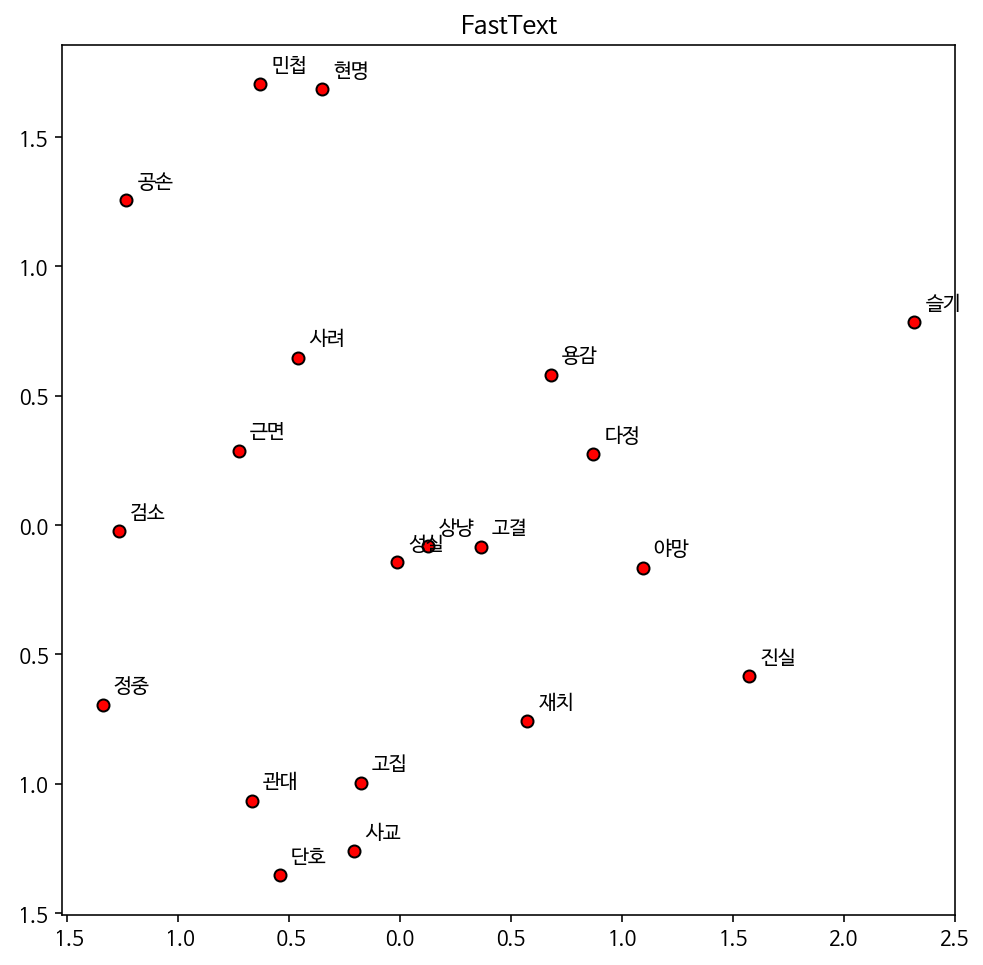

In [ ]:
display_pca_scatterplot(fastext_model, "FastText",
                        ['민첩', '야망', '용감', '공손', 
                         '정중', '근면', '성실', '단호', 
                         '관대', '상냥', '다정', '진실', 
                         '사교', '고집', '사려', '검소', 
                         '고결', '현명', '슬기', '재치'])

##Lexical Substitution

In [197]:
def lexical_sub(sentence, word_vector):
    try:
        i = np.random.randint(len(sentence))
        result = sentence[::]
        if word_vector == word2vec_model:
          result[i] = word2vec_model.wv.most_similar(sentence[i])[0][0]

        elif word_vector == glove_model:
          result[i] = glove_model.most_similar(sentence[i])[0][0]

        elif word_vector == fastext_model:
          result[i] = fastext_model.get_nearest_neighbors(sentence[i])[0][1]

    except:   
        return None

    return result

In [198]:
def augment_corpus(src_corpus, tgt_corpus, word_vector):
    new_src_corpus = []
    new_tgt_corpus = []
    corpus_size = len(src_corpus)
    
    for i in tqdm(range(corpus_size)):
        old_src_sen = src_corpus[i]
        old_tgt_sen = tgt_corpus[i]
        
        new_src_sen = lexical_sub(old_src_sen, word_vector)
        new_tgt_sen = lexical_sub(old_tgt_sen, word_vector)

        if new_src_sen :
            new_src_corpus.append(new_src_sen)
            new_tgt_corpus.append(old_tgt_sen)
        
        if new_tgt_sen:
            new_tgt_corpus.append(new_tgt_sen)
            new_src_corpus.append(old_src_sen)
    
    return new_src_corpus, new_tgt_corpus

In [199]:
new_wv_que_corpus, new_wv_ans_corpus = augment_corpus(que_corpus, ans_corpus, word2vec_model)

  0%|          | 0/7607 [00:00<?, ?it/s]

In [200]:
new_gv_que_corpus, new_gv_ans_corpus = augment_corpus(que_corpus, ans_corpus, glove_model)

  0%|          | 0/7607 [00:00<?, ?it/s]

In [201]:
new_ft_que_corpus, new_ft_ans_corpus = augment_corpus(que_corpus, ans_corpus, fastext_model)

  0%|          | 0/7607 [00:00<?, ?it/s]

In [202]:
new_que_corpus = que_corpus + new_wv_que_corpus + new_gv_que_corpus + new_ft_que_corpus
new_ans_corpus = ans_corpus + new_wv_ans_corpus + new_gv_ans_corpus + new_ft_ans_corpus

In [203]:
print("Word2Vec Augmented Data Size : ({}, {})".format(len(new_wv_que_corpus), len(new_wv_ans_corpus)))
print("Glove Augmented Data Size : ({}, {})".format(len(new_gv_que_corpus), len(new_gv_ans_corpus)))
print("FastText Augmented Data Size : ({}, {})".format(len(new_ft_que_corpus), len(new_ft_ans_corpus)))

Word2Vec Augmented Data Size : (13234, 13234)
Glove Augmented Data Size : (15118, 15118)
FastText Augmented Data Size : (15214, 15214)


In [204]:
print("Original Data Size : ({}, {})".format(len(que_corpus), len(ans_corpus)))
print("Augmented Data Size : ({}, {})".format(len(new_que_corpus), len(new_ans_corpus)))

Original Data Size : (7607, 7607)
Augmented Data Size : (51173, 51173)


In [268]:
print("Original Data")
for i in que_corpus:
  if '짜증' in i and '나' in i and '네' in i and len(i) == 4:
    print(" ".join(i))
print()
print("Augmented Data")
for i in new_que_corpus:
  if '짜증' in i and '나' in i and '네' in i and len(i) == 4:
    print(" ".join(i))

Original Data
으으 짜증 나 네

Augmented Data
.-_-; 짜증 나 네
으으 짜증 나 네
으으 짜증 나 네
으으 짜증 나 네
으으 짜증 나 네
으으으 짜증 나 네


In [267]:
print("Original Data")
for i in que_corpus:
  if '카드' in i and '망가졌' in i:
    print(" ".join(i))
print()
print("Augmented Data")
for i in new_que_corpus:
  if '카드' in i and '망가졌' in i:
    print(" ".join(i))

Original Data
sd 카드 망가졌 어

Augmented Data
+& 카드 망가졌 어
sd 카드 망가졌 되
sd 카드 망가졌 어
sd 카드 망가졌 어
sd 카드 망가졌 어
sd 카드 망가졌 어


Data Agumentation 이후 특수기호 .-_-; +& 등이 생겨났다.
<br/>Word Vector 모델 제작자가 의도하여 인터넷에서 사용하는 특수기호(이모티콘 등)을 포함시킨 것이다.

##Ascending Order



```
new_que_corpus = que_corpus + new_wv_que_corpus + new_gv_que_corpus + new_ft_que_corpus
new_ans_corpus = ans_corpus + new_wv_ans_corpus + new_gv_ans_corpus + new_ft_ans_corpus
```



Augmented 데이터를 병합하면서 순서가 뒤섞였다.
<br/>훈련 데이터와 시험 데이터로 분리할 때 
<br/>Augment하면서 생겨난 비슷한 문장들이 훈련 데이터와 시험 데이터에 중복되는 것을 방지하기 위해서
<br/>컬럼 'question'을 기준으로 가나다순 정렬한다.

In [233]:
new_corpus_df = pd.DataFrame({'question':new_que_corpus, 'answer':new_ans_corpus })
new_corpus_sorted_df = new_corpus_df.sort_values(by=['question'], ascending = True)
new_corpus_sorted_df = new_corpus_sorted_df.reset_index()
del new_corpus_sorted_df['index']

new_corpus_sorted_df

,question,answer
0,"[+&, 카드, 망가졌, 어]","[다시, 새로, 사, 는, 게, 마음, 편해요, .]"
1,"[.-_-;, 짜증, 나, 네]","[짜증, 날, 만, 해요, .]"
2,"[..-_-;, .]","[수십, 번, 생각, 이, 나, 도, 잊, 어야, 해요, .]"
3,"[..., 라도, 해야, 살, 거, 같, 은데, .]","[작, 은, 일, 부터, 시작, 해, 보, 세요, .]"
4,"[..., 먹, 을까, ?]","[좀, 먹, 어도, 괜찮, 아요, .]"
...,...,...
51168,"[힘듭니다, 오늘, 는데, 무너졌, 어]","[다시, 일어서, 세요, .]"
51169,"[힘듭니다, 오늘, 또, 무너졌, 어]","[다시, 일어서, 세요, 는데]"
51170,"[힘듭니다, 오늘, 또, 무너졌, 어]","[다시, 일어서, 싶, .]"
51171,"[힘듭니다, 오늘, 또, 무너졌, 어]","[다시, 일어서, 세요, .]"


In [239]:
new_que_corpus = list(new_corpus_sorted_df['question'])
new_ans_corpus = list(new_corpus_sorted_df['answer'])

##File I/O

전처리한 코퍼스 파일을 저장하고 다음에 불러올 수 있다면
<br/>전처리 과정을 건너뛰고 바로 모델 구성과 학습을 진행할 수 있다.
<br/>If Statement, For Loop, File I/O를 이용해
전처리한 코퍼스 파일을 저장하고 불러온다.

In [9]:
basic_txt_format = 'new_00_11_corpus.txt'
basic_bin_format = 'new_00_11_corpus.bin'
sen_type = ['que', 'ans']
vec_type = ['wv', 'gv', 'ft']

def original_corpus(basic_file_format):
    augmented_corpus_list = []
    for i in range(len(sen_type)):
      file_format = basic_file_format.replace('00_11', sen_type[i]) 
      augmented_corpus_list.append(file_format) 
    return augmented_corpus_list

def oddeven(basic_file_format, i):
    if i % len(sen_type) == 0:
        file_format = basic_file_format.replace('11', sen_type[i])
    else:
        file_format = basic_file_format.replace('11', sen_type[i])
    return file_format

def multiple(basic_file_format):
  augmented_corpus_list = original_corpus(basic_file_format)
  for j in range(len(vec_type)):
      for k in range(len(sen_type)):
          if j == 0:
              file_format = basic_file_format.replace('00', vec_type[j])
          elif j == 1:
              file_format = basic_file_format.replace('00', vec_type[j])
          elif j == 2:
              file_format = basic_file_format.replace('00', vec_type[j])  
          augmented_corpus_list.append(oddeven(file_format, k))
  return augmented_corpus_list

In [10]:
txt_list = multiple(basic_txt_format)
bin_list = multiple(basic_bin_format)

file_path = '/content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/'
txt_path_list = []
bin_path_list = []

for i in txt_list:
  txt_path_list.append(file_path + i) 

for i in bin_list:
  bin_path_list.append(file_path + i)

In [11]:
for j in range(len(txt_path_list)):
  print(txt_path_list[j], '   ', bin_path_list[j].rjust(86))

/content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_que_corpus.txt         /content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_que_corpus.bin
/content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_ans_corpus.txt         /content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_ans_corpus.bin
/content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_wv_que_corpus.txt      /content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_wv_que_corpus.bin
/content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_wv_ans_corpus.txt      /content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_wv_ans_corpus.bin
/content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_gv_que_corpus.txt      /content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_gv_que_corpus.bin
/content/drive/MyDrive/lms/transformer_chatbot/augmented_corpus/new_gv_ans_corpus.txt      /content/drive/MyDrive/lms/tra

In [12]:
def save_corpus_txt(corpus_path, corpus):
    with open(corpus_path, 'w') as f:
        wr = csv.writer(f)
        wr.writerows(corpus)

def save_corpus_bin(corpus_path, corpus):
    with open(corpus_path, 'wb') as f:
      pickle.dump(corpus, f)

def read_corpus_bin(corpus_path):
    with open(corpus_path, 'rb') as f:
       corpus = pickle.load(f)
    return corpus

In [ ]:
for i in txt_path_list:
  if 'new_que' in i:
      save_corpus_txt(i, new_que_corpus)
  elif 'new_ans' in i:
      save_corpus_txt(i, new_ans_corpus)
  elif 'wv' in i and 'que' in i:
      save_corpus_txt(i, new_wv_que_corpus)
  elif 'wv' in i and 'ans' in i:
      save_corpus_txt(i, new_wv_ans_corpus)
  elif 'gv' in i and 'que' in i:
      save_corpus_txt(i, new_gv_que_corpus)
  elif 'gv' in i and 'ans' in i:
      save_corpus_txt(i, new_gv_ans_corpus)
  elif 'ft' in i and 'que' in i:
      save_corpus_txt(i, new_ft_que_corpus)
  elif 'ft' in i and 'ans' in i:
      save_corpus_txt(i, new_ft_ans_corpus)

In [243]:
for i in bin_path_list:
  if 'new_que' in i:
      save_corpus_bin(i, new_que_corpus)
  elif 'new_ans' in i:
      save_corpus_bin(i, new_ans_corpus)
  elif 'wv' in i and 'que' in i:
      save_corpus_bin(i, new_wv_que_corpus)
  elif 'wv' in i and 'ans' in i:
      save_corpus_bin(i, new_wv_ans_corpus)
  elif 'gv' in i and 'que' in i:
      save_corpus_bin(i, new_gv_que_corpus)
  elif 'gv' in i and 'ans' in i:
      save_corpus_bin(i, new_gv_ans_corpus)
  elif 'ft' in i and 'que' in i:
      save_corpus_bin(i, new_ft_que_corpus)
  elif 'ft' in i and 'ans' in i:
      save_corpus_bin(i, new_ft_ans_corpus)

In [13]:
for i in bin_path_list:
    if 'new_que' in i:
        new_que_corpus_from_file = read_corpus_bin(i)
    elif 'new_ans' in i:
        new_ans_corpus_from_file = read_corpus_bin(i)
    elif 'wv' in i and 'que' in i:
        new_wv_que_corpus_from_file = read_corpus_bin(i)
    elif 'wv' in i and 'ans' in i:
        new_wv_ans_corpus_from_file = read_corpus_bin(i)
    elif 'gv' in i and 'que' in i:
        new_gv_que_corpus_from_file = read_corpus_bin(i)
    elif 'gv' in i and 'ans' in i:
        new_gv_ans_corpus_from_file = read_corpus_bin(i)
    elif 'ft' in i and 'que' in i:
        new_ft_que_corpus_from_file = read_corpus_bin(i)
    elif 'ft' in i and 'ans' in i:
        new_ft_ans_corpus_from_file = read_corpus_bin(i)

In [246]:
print("Word2Vec Augmented Data Size : ({}, {})".format(len(new_wv_que_corpus_from_file), len(new_wv_ans_corpus_from_file)))
print("Glove Augmented Data Size : ({}, {})".format(len(new_gv_que_corpus_from_file), len(new_gv_ans_corpus_from_file)))
print("FastText Augmented Data Size : ({}, {})".format(len(new_ft_que_corpus_from_file), len(new_ft_ans_corpus_from_file)))
print("Augmented Data Size : ({}, {})".format(len(new_que_corpus_from_file), len(new_ans_corpus_from_file)))

Word2Vec Augmented Data Size : (13234, 13234)
Glove Augmented Data Size : (15118, 15118)
FastText Augmented Data Size : (15214, 15214)
Augmented Data Size : (51173, 51173)


#Data Vectorization

In [14]:
def make_vocabulary(que_corpus, ans_corpus, vocab_size):

    src_corpus = [ " ".join(sen) for sen in que_corpus ]
    tgt_corpus = [ " ".join(sen) for sen in ans_corpus ]
    
    mecab = Mecab()
    src_tok = []
    tgt_tok = []
    word_tok = []
    
    for s in src_corpus:
        tmp = mecab.morphs(s)
        src_tok.append(tmp)
        word_tok.append(tmp)
    
    for t in tgt_corpus:
        tmp = mecab.morphs(t)
        tgt_tok.append(tmp)
        word_tok.append(tmp)
        
    words = np.concatenate(word_tok).tolist()
    counter = Counter(words)
    counter = counter.most_common(vocab_size-4)
    vocab = ['<PAD>', '<start>', '<UNK>', '<end>'] + [key for key, _ in counter]
    # 사전 구성
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    # 변환 text to index
    src_corpus = list(map(wordlist_to_indexlist, src_tok))
    tgt_corpus = list(map(wordlist_to_indexlist, tgt_tok))

    index_to_word = {index:word for word, index in word_to_index.items()}

    return src_corpus, tgt_corpus, word_to_index, index_to_word

In [15]:
vocab_size = 20000
src_corpus, tgt_corpus, word_to_index, index_to_word = make_vocabulary(new_ans_corpus, new_que_corpus, vocab_size)

In [16]:
def data_vectorization(src_corpus, tgt_corpus):

  enc_corpus = src_corpus
  dec_corpus = []
  for sen in tgt_corpus:
    dec_corpus.append([word_to_index['<start>']] + sen + [word_to_index['<end>']])

  enc_tensor = tf.keras.preprocessing.sequence.pad_sequences(enc_corpus, padding='post')
  dec_tensor = tf.keras.preprocessing.sequence.pad_sequences(dec_corpus, padding='post')

  return enc_tensor, dec_tensor

In [17]:
enc_tensor, dec_tensor = data_vectorization(src_corpus, tgt_corpus)

In [18]:
enc_train, enc_test, dec_train, dec_test = \
train_test_split(enc_tensor, dec_tensor, test_size=0.01)

In [19]:
print("Index Word")
print(list(index_to_word.items())[:10])
print()
print("Word Index")
print(list(word_to_index.items())[:10])

Index Word
[(0, '<PAD>'), (1, '<start>'), (2, '<UNK>'), (3, '<end>'), (4, '.'), (5, '이'), (6, '는'), (7, '하'), (8, '을'), (9, '가')]

Word Index
[('<PAD>', 0), ('<start>', 1), ('<UNK>', 2), ('<end>', 3), ('.', 4), ('이', 5), ('는', 6), ('하', 7), ('을', 8), ('가', 9)]


In [20]:
print(new_ans_corpus[0])
print(enc_tensor[0])
print()
print(new_que_corpus[0])
print(dec_tensor[0])

['다시', '새로', '사', '는', '게', '마음', '편해요', '.']
[ 127 2110  179    6   24   51 5062    4    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]

['+&', '카드', '망가졌', '어']
[   1 8017 1811 5446   13    3    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


#모델 구성

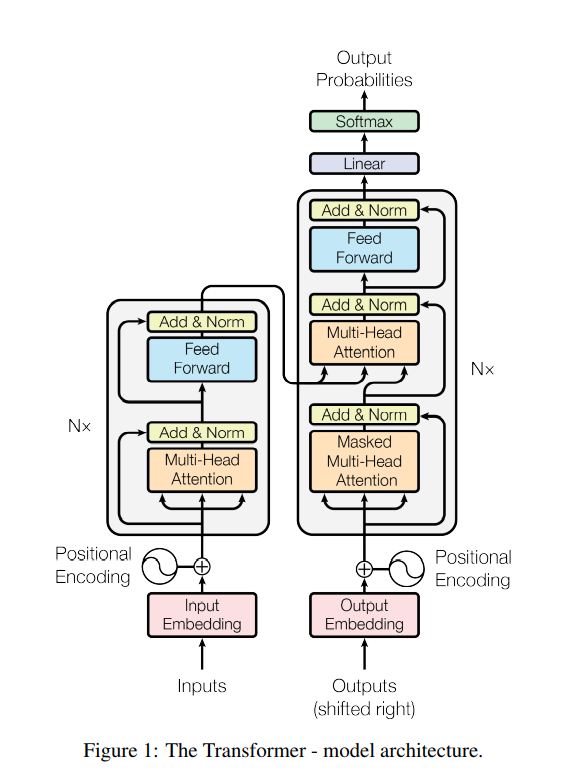

In [276]:
Image(filename='/content/drive/MyDrive/lms/transformer_translation/Transformer.png') 

##Transformer

In [21]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

In [22]:
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [23]:
def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

In [24]:
def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

In [25]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        self.depth = d_model // self.num_heads

        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)

        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions


    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x


    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)

        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)

        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)

        out = self.combine_heads(out)
        out = self.linear(out)

        return out, attention_weights

In [26]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.fc2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)

        return out

In [27]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):

        """
        Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual

        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, enc_attn

In [28]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, enc_out, causality_mask, padding_mask):

        """
        Masked Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual

        """
        Multi-Head Attention
        """
        residual = out
        out = self.norm_2(out)
        out, dec_enc_attn = self.dec_self_attn(out, enc_out, enc_out, causality_mask)
        out = self.do(out)
        out += residual

        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

In [29]:
class Encoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):
        out = x

        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)

        return out, enc_attns

In [30]:
class Decoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]

    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x

        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, causality_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

In [31]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out


    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, causality_mask, dec_mask)

        logits = self.fc(dec_out)

        return logits, enc_attns, dec_attns, dec_enc_attns

##Learning Rate Schedule 

In [32]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()

        self.d_model = d_model
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)

        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

##Loss Function

In [33]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

##Train Step

In [34]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output과 비교하기 위해 right shift를 통해 생성한 최종 타겟

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

##Evaluation

In [35]:
def preprocess_question(question):

    question = question.lower()
    question = re.sub(r"([?.!])", r" \1 ", question)
    question = re.sub(r'[" "]+', " ", question)
    question = re.sub(r"[^0-9ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z?.!]+", " ", question)
    question = question.strip()

    return question

MeCab 형태소 토큰화를 통해 만든 Vocabulary의 word_to_index에 문장부호 , 가 등록되어 있지 않아
<br/>검증 데이터와 시험 데이터를 전처리할 때 , 을 제거한다.
<br/>나머지 문장부호( ? . !) , 한글, 영문자, 숫자는 남긴다.

In [36]:
def evaluate(sentence, model, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_question(sentence)
    
    s = src_tokenizer.morphs(sentence)
    tokens = []
    for i in s:
        tokens.append(word_to_index[i])
    pieces = tokens        
        
    # pieces = src_tokenizer.encode_as_pieces(sentence)
    # tokens = src_tokenizer.encode_as_ids(sentence)
        
    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')
    
    ids = []
    output = tf.expand_dims([1], 0)
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(_input, output)

        predictions, enc_attns, dec_attns, dec_enc_attns =\
        model(_input, 
              output,
              enc_padding_mask,
              combined_mask,
              dec_padding_mask)

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()

        if predicted_id == 3:
            # result = tgt_tokenizer.decode_ids(ids)
            result = []
            for i in ids:
                result.append(index_to_word[i])
            
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)

    # result = tgt_tokenizer.decode_ids(ids)
    result = ''
    for i in ids:
        result += index_to_word[i]
    
    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [37]:
def answer_generate(sentence, model, src_tokenizer, tgt_tokenizer):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = \
    evaluate(sentence, model, src_tokenizer, tgt_tokenizer)

    return result

In [38]:
def answer_print(sentence, model, src_tokenizer, tgt_tokenizer):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = \
    evaluate(sentence, model, src_tokenizer, tgt_tokenizer)

    print(f'Input: {sentence}')
    print(f'Predicted Answer: {" ".join(result)}')

#BLEU Score

챗봇의 경우 올바른 대답을 하는지가 중요한 평가 지표이다.
<br/>올바른 답변을 하는지 눈으로 확인할 수 있겠지만 많은 데이터의 경우는 모든 결과를 확인할 수 없다.
<br/>BLEU Score를 통해 주어진 질문에 적절한 답변을 하는지 정량적으로 평가한다.

In [39]:
def calculate_bleu(reference, candidate, weights=[0.25, 0.25, 0.25, 0.25]):
    return sentence_bleu([reference],
                         candidate,
                         weights=weights,
                         smoothing_function=SmoothingFunction().method1)

In [40]:
def eval_bleu(src_corpus, tgt_corpus, model, verbose=True):
    total_score = 0.0
    sample_size = len(tgt_corpus)

    for idx in tqdm(range(sample_size)):
        src_tokens = src_corpus[idx]
        tgt_tokens = tgt_corpus[idx]

    # src_sentence = tokenizer.decode_ids((src_tokens.tolist()))
    # tgt_sentence = tokenizer.decode_ids((tgt_tokens.tolist()))

        src_sentence = []
        tgt_sentence = []
        
        for w in src_tokens:
            if w != 0:
                ow = index_to_word[w]
                src_sentence.append(ow)

        src_sentence = ' '.join(src_sentence)
        
        for w in tgt_tokens:
            if w != 0 and w != 1 and w != 3:
                ow = index_to_word[w]
                tgt_sentence.append(ow)
   
        tgt_sentence = ' '.join(tgt_sentence)
        
        reference = preprocess_question(tgt_sentence).split()
        candidate = answer_generate(src_sentence, model, tokenizer, tokenizer)
        
        score = sentence_bleu([reference], candidate,
                              smoothing_function=SmoothingFunction().method1)
        total_score += score

        if verbose:
            print("Source Sentence: ", src_sentence)
            print("Model Prediction: ", " ".join(candidate))
            print("Real Answer: ", " ".join(reference))
            print("Score: %lf\n" % score)

    print("Num of Sample:", sample_size)
    print("Total Score:", total_score / sample_size)

#Hyperparameter

In [40]:
reorderlist = ['Encoder & Decoder Layer', 'Model Dimension', 'Feedforwad Hidden Layer', 'Feedforward Network Dimension',
               'Normalization Layer', 'Tokenizer', 'SRC Vocab Size', 'TGT Vocab Size', 'POS Length', 'Text Max Length',
               'Dropout Rate', 'Shared FC', 'Shared EMB', 'Learning Rate', 'Optimizer', 'Activation Function',
               'Loss Function', 'Epoch', 'Batch Size']

first_hyperparameter = pd.DataFrame({'First Model':{'Encoder & Decoder Layer':2, 'Model Dimension':512,
                                     'Feedforwad Hidden Layer':8, 'Feedforward Network Dimension':2048,
                                     'Normalization Layer':'Pre-LN', 'Tokenizer':'MeCab',
                                     'SRC Vocab Size':20000, 'TGT Vocab Size':20000,
                                     'POS Length':200, 'Text Max Length':40, 'Dropout Rate':0.3,
                                     'Shared FC': 'True', 'Shared EMB': 'True',
                                     'Learning Rate':'Scheduler', 'Optimizer':'Adam', 'Activation Function':'Relu',
                                     'Loss Function':'Sparse Categorical Crossentropy', 'Epoch':5, 'Batch Size':64}})

first_hyperparameter = first_hyperparameter.iloc[pd.Categorical(first_hyperparameter.index,reorderlist).argsort()]

first_hyperparameter.loc[:,'Second Model'] = [2, 1024, 8, 4096, 'Pre-LN', 'MeCab', 20000, 20000,
                                              200, 40, 0.3, 'True', 'True', 'Scheduler', 'Adam', 'Relu',
                                              'Sparse Categorical Crossentropy', 5, 256]


pd.set_option('display.max_columns', None)
first_hyperparameter

,First Model,Second Model
Encoder & Decoder Layer,2,2
Model Dimension,512,1024
Feedforwad Hidden Layer,8,8
Feedforward Network Dimension,2048,4096
Normalization Layer,Pre-LN,Pre-LN
Tokenizer,MeCab,MeCab
SRC Vocab Size,20000,20000
TGT Vocab Size,20000,20000
POS Length,200,200
Text Max Length,40,40


#First Model

In [41]:
vocab_size = 20000
d_model = 512

first_transformer = Transformer(n_layers=2,
                          d_model=512,
                          n_heads=8,
                          d_ff=2048,
                          src_vocab_size=vocab_size,
                          tgt_vocab_size=vocab_size,
                          pos_len=200,
                          dropout=0.3,
                          shared_fc=True,
                          shared_emb=True)

In [42]:
learning_rate = LearningRateScheduler(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)

In [43]:
first_model_loss_df = pd.DataFrame({'Epoch':[0], 'Loss':[0]})

batch_size = 64
epochs = 5
train_count = 0
tokenizer = Mecab()
 
sentence_list = ["지루하다, 놀러가고 싶어.", "오늘 일찍 일어났더니 피곤하다.",
                 "간만에 여자친구랑 데이트 하기로 했어.", "집에 있는다는 소리야."]

for epoch in range(epochs):
      total_loss = 0

      idx_list = list(range(0, enc_train.shape[0], batch_size))
      random.shuffle(idx_list)

      for (batch, idx) in enumerate(idx_list):
          batch_loss, enc_attns, dec_attns, dec_enc_attns = \
          train_step(enc_train[idx:idx+batch_size],
                     dec_train[idx:idx+batch_size],
                     first_transformer,
                     optimizer)

          total_loss += batch_loss

          train_count += 1

          if train_count % len(idx_list) == 0:
              first_model_loss_df.loc[epoch] = [epoch + 1, round(total_loss.numpy() / (batch + 1), 4)]
              first_model_loss_df = first_model_loss_df.astype({'Epoch':'int'})
              print('Epoch {}'.format(epoch + 1))
              print('Loss {:.4f}'.format(total_loss.numpy() / (batch + 1)))
              print()

              for sentence in sentence_list:
                  answer_print(sentence, first_transformer, tokenizer, tokenizer)
                  print()
              print()

Epoch 1
Loss 5.3032

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 오늘 도 없 어

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 오늘 오늘 하루

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 나 랑 친구 가 너무 힘들 게 좋 아

Input: 집에 있는다는 소리야.
Predicted Answer: 비 가 고 싶 어


Epoch 2
Loss 2.3979

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 계속 생각 하 고 싶 어

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 오늘 아침 일찍 일어나 고 일어나

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 친구 의 내 가 이해 가 없 어

Input: 집에 있는다는 소리야.
Predicted Answer: 나가 고 싶 어


Epoch 3
Loss 1.2573

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 계속 보 기 로 했 으면 좋 겠 어

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 오늘 도 잠 이 너무 피곤 해

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 내 가 내 가 좋 아 하 는 거 같 아 .

Input: 집에 있는다는 소리야.
Predicted Answer: 스테이크 도 많이 고 싶 다


Epoch 4
Loss 1.0481

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 잠 못 하 겠 죠

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 하늘 입 고 자

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 친구 에서 만나 면 여행 만 하 면 오해 하 면 어떡 하 죠 ?

Input: 집에 있는다는 소리야.
Pre

,Epoch,Loss
0,1,5.3032
1,2,2.3979
2,3,1.2573
3,4,1.0481
4,5,0.9982


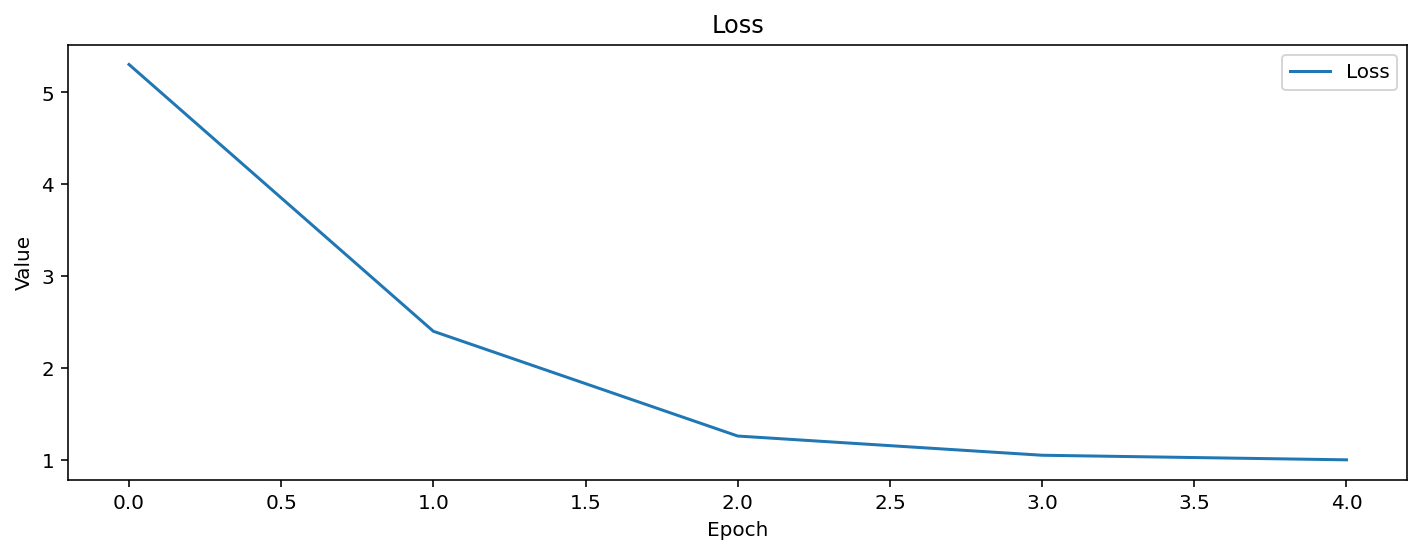

In [44]:
CSS = """.output {flex-direction: row;}"""
HTML('<style>{}</style>'.format(CSS))

display(first_model_loss_df)
print("\n")

plt.figure(figsize=[12, 4])
plt.plot(first_model_loss_df['Loss'] , label="Loss")
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [45]:
first_model_loss_df.to_csv("/content/drive/MyDrive/lms/transformer_chatbot/first_model_loss.csv", index = False)

In [46]:
for sentence in sentence_list:
  answer_print(sentence, first_transformer, tokenizer, tokenizer)
  print()

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 짝 남 이 오 는 게 너무 보 고 싶 어 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 내일 일찍 일어나 는 거 야

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 여자 친구 가 같 은 데 만 좋 아

Input: 집에 있는다는 소리야.
Predicted Answer: 우리 집 망한 거 야



In [47]:
eval_bleu(enc_test[:3], dec_test[:3], first_transformer, True)

  0%|          | 0/3 [00:00<?, ?it/s]

Source Sentence:  커피 한잔 마시 며 기다려 보 세요 .
Model Prediction:  사람 많 아 기다려야 할지 기다려야 할지 없 어
Real Answer:  사람 많 아서 기다려야 할지 는
Score: 0.071718

Source Sentence:  함께 일 때 비로소 전부 라고 느껴 지 는 연애 가 아닐까 생각 해 봅니다 .
Model Prediction:  이상 적 인 관계 는 뭘까 ?
Real Answer:  이상 적 인 관계 이 뭘까 ?
Score: 0.488923

Source Sentence:  여행 을 떠나 세요 .
Model Prediction:  이런 일상 에서 휙 떠나 고 싶 어
Real Answer:  이런 일상 에서 휙 떠나 고 싶 되
Score: 0.840896

Num of Sample: 3
Total Score: 0.4671790842536194


In [48]:
eval_bleu(enc_test, dec_test, first_transformer, False)

  0%|          | 0/512 [00:00<?, ?it/s]

Num of Sample: 512
Total Score: 0.32975910567761824


#Second Model

In [42]:
vocab_size = 20000
d_model = 1024

second_transformer = Transformer(n_layers=2,
                          d_model=1024,
                          n_heads=8,
                          d_ff=4096,
                          src_vocab_size=vocab_size,
                          tgt_vocab_size=vocab_size,
                          pos_len=200,
                          dropout=0.3,
                          shared_fc=True,
                          shared_emb=True)

In [43]:
learning_rate = LearningRateScheduler(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)

In [47]:
second_model_loss_df = pd.DataFrame({'Epoch':[0], 'Loss':[0]})

batch_size = 256
epochs = 5
train_count = 0
tokenizer = Mecab()
 
sentence_list = ["지루하다, 놀러가고 싶어.", "오늘 일찍 일어났더니 피곤하다.",
                 "간만에 여자친구랑 데이트 하기로 했어.", "집에 있는다는 소리야."]

for epoch in range(epochs):
      total_loss = 0

      idx_list = list(range(0, enc_train.shape[0], batch_size))
      random.shuffle(idx_list)

      for (batch, idx) in enumerate(idx_list):
          batch_loss, enc_attns, dec_attns, dec_enc_attns = \
          train_step(enc_train[idx:idx+batch_size],
                     dec_train[idx:idx+batch_size],
                     second_transformer,
                     optimizer)

          total_loss += batch_loss

          train_count += 1

          if train_count % len(idx_list) == 0:
              second_model_loss_df.loc[epoch] = [epoch + 1, round(total_loss.numpy() / (batch + 1), 4)]
              second_model_loss_df = second_model_loss_df.astype({'Epoch':'int'})
              print('Epoch {}'.format(epoch + 1))
              print('Loss {:.4f}'.format(total_loss.numpy() / (batch + 1)))
              print()

              for sentence in sentence_list:
                  answer_print(sentence, second_transformer, tokenizer, tokenizer)
                  print()
              print()

Epoch 1
Loss 6.9304

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 썸 는 게 하 는 게 하 는 게 하 는 게 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 짝 남 이 안

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 좋 아 하 는 게 하 는 게 하 는 게 .

Input: 집에 있는다는 소리야.
Predicted Answer: 짝 남 이 이 안 하 는 게 하 는 게 하 는 게 .


Epoch 2
Loss 4.4701

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 사랑 이 별 가 고 싶 어

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 오늘 도 안 되 는 거 같 아

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 좋 아 하 는 여자 애 가 없 어 .

Input: 집에 있는다는 소리야.
Predicted Answer: 오늘 도 안 되 고 싶 어


Epoch 3
Loss 2.7813

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 사 랑 이 게 제 일 게 좋 아 하 는 게 맞 는 게 맞 는 게 맞 는 게 맞 는 게 맞 는 게 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 나 내일 뭐 입 었 어

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 좋 아 하 는 여자 한테 연락 하 는 게 되 는 게 없 어 .

Input: 집에 있는다는 소리야.
Predicted Answer: 스테이크 먹 고 싶 다


Epoch 4
Loss 1.2323

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 사랑 에 게 만들 고 싶 습니다

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 오늘 아침 일어나 또 아침 이 네

In

,Epoch,Loss
0,1,6.9304
1,2,4.4701
2,3,2.7813
3,4,1.2323
4,5,0.6806


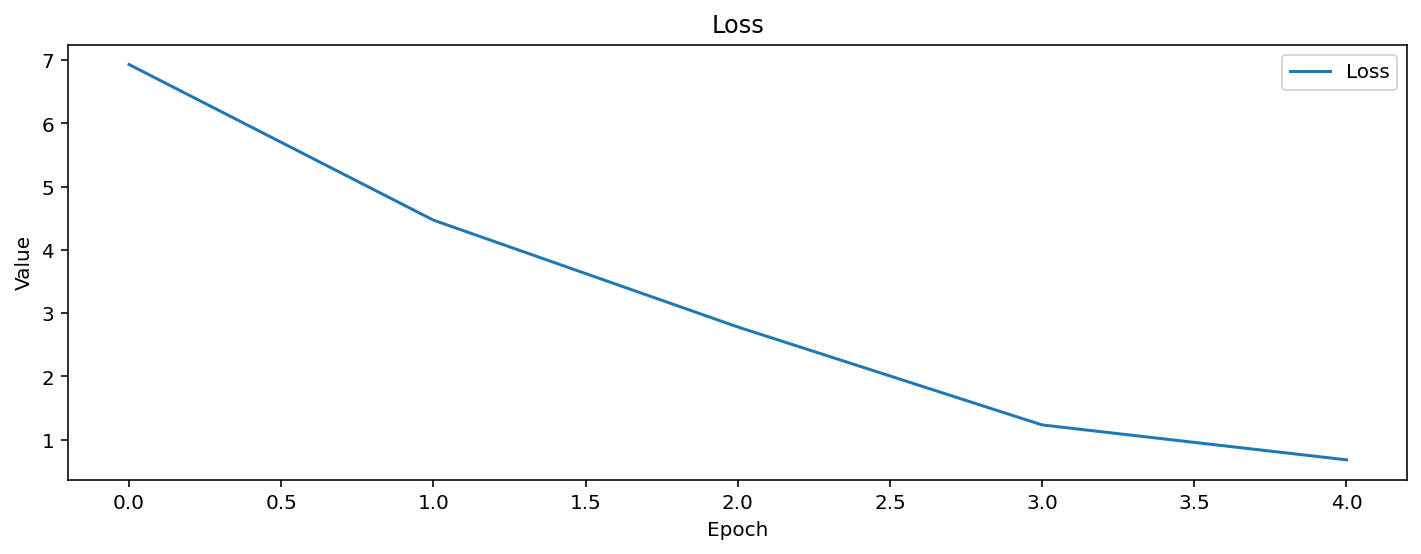

In [48]:
CSS = """.output {flex-direction: row;}"""
HTML('<style>{}</style>'.format(CSS))

display(second_model_loss_df)
print("\n")

plt.figure(figsize=[12, 4])
plt.plot(second_model_loss_df['Loss'] , label="Loss")
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [49]:
second_model_loss_df.to_csv("/content/drive/MyDrive/lms/transformer_chatbot/second_model_loss.csv", index = False)

In [50]:
for sentence in sentence_list:
  answer_print(sentence, second_transformer, tokenizer, tokenizer)
  print()

Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 사랑 이 게 제일 다니 지

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 나 아침 없이 잘 아 하 는 것 같 음 ?

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 매일 여자 친구 의 사친 이 뭐 가 잘 하 지 .

Input: 집에 있는다는 소리야.
Predicted Answer: 스테이크 먹 고 싶 다



In [51]:
eval_bleu(enc_test[:3], dec_test[:3], second_transformer, True)

  0%|          | 0/3 [00:00<?, ?it/s]

Source Sentence:  자신 하 고 만나 는 분 도 중요 해요 .
Model Prediction:  누굴 만나 는 것 도 귀찮 아
Real Answer:  누굴 만나 는 것 도 귀찮 아
Score: 1.000000

Source Sentence:  시 달리
Model Prediction:  이 별 이 .
Real Answer:  새 출발
Score: 0.000000

Source Sentence:  좋 은 마무리 가 되 었 길 바랍니다 .
Model Prediction:  4 년 을 엊그제 마무리 했 습니다
Real Answer:  4 9 을 엊그제 마무리 했 습니다
Score: 0.643459

Num of Sample: 3
Total Score: 0.5478196280535873


In [52]:
eval_bleu(enc_test, dec_test, second_transformer, False)

  0%|          | 0/512 [00:00<?, ?it/s]

Num of Sample: 512
Total Score: 0.5141685911207127


#최종 모델

,Final Model
Encoder & Decoder Layer,2
Model Dimension,1024
Feedforwad Hidden Layer,8
Feedforward Network Dimension,4096
Normalization Layer,Pre-LN
Tokenizer,MeCab
SRC Vocab Size,20000
TGT Vocab Size,20000
POS Length,200
Text Max Length,40


,Epoch,Loss
0,1,6.9304
1,2,4.4701
2,3,2.7813
3,4,1.2323
4,5,0.6806


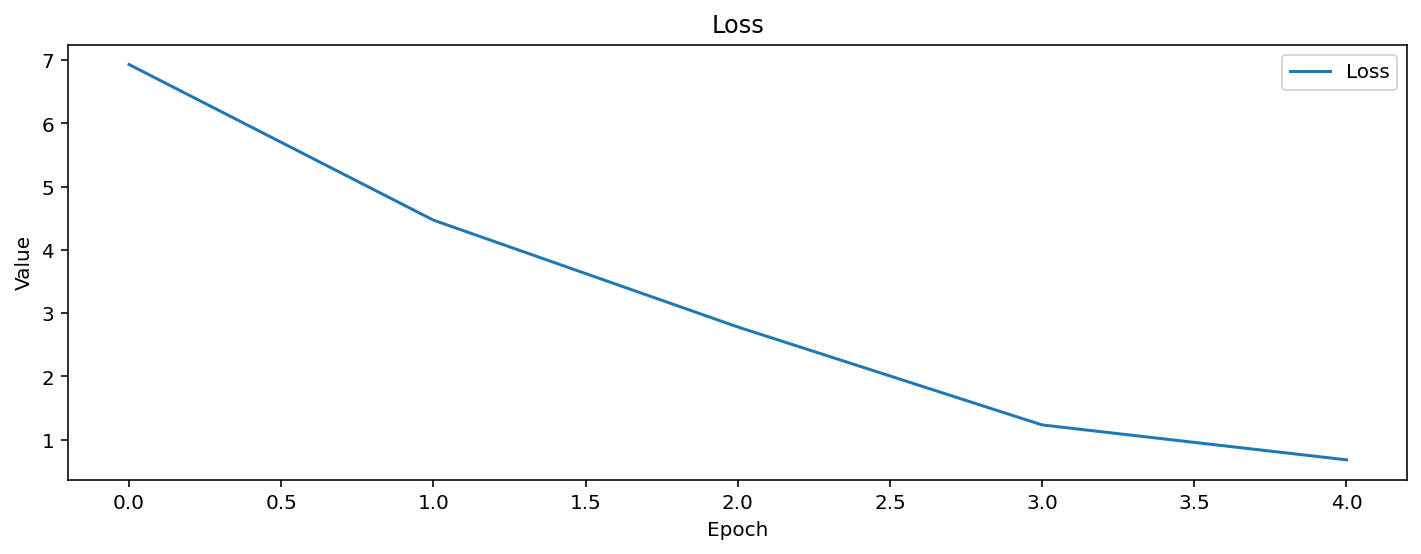



Input: 지루하다, 놀러가고 싶어.
Predicted Answer: 사랑 이 게 제일 다니 지

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted Answer: 나 아침 없이 잘 아 하 는 것 같 음 ?

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted Answer: 매일 여자 친구 의 사친 이 뭐 가 잘 하 지 .

Input: 집에 있는다는 소리야.
Predicted Answer: 스테이크 먹 고 싶 다





  0%|          | 0/512 [00:00<?, ?it/s]

Num of Sample: 512
Total Score: 0.5141685911207127


In [54]:
CSS = """.output {flex-direction: row;}"""
HTML('<style>{}</style>'.format(CSS))

reorderlist = ['Encoder & Decoder Layer', 'Model Dimension', 'Feedforwad Hidden Layer', 'Feedforward Network Dimension',
               'Normalization Layer', 'Tokenizer', 'SRC Vocab Size', 'TGT Vocab Size', 'POS Length', 'Text Max Length',
               'Dropout Rate', 'Shared FC', 'Shared EMB', 'Learning Rate', 'Optimizer', 'Activation Function',
               'Loss Function', 'Epoch', 'Batch Size']

final_hyperparameter = pd.DataFrame({'Final Model':{'Encoder & Decoder Layer':2, 'Model Dimension':1024,
                                     'Feedforwad Hidden Layer':8, 'Feedforward Network Dimension':4096,
                                     'Normalization Layer':'Pre-LN', 'Tokenizer':'MeCab',
                                     'SRC Vocab Size':20000, 'TGT Vocab Size':20000,
                                     'POS Length':200, 'Text Max Length':40, 'Dropout Rate':0.3,
                                     'Shared FC': 'True', 'Shared EMB': 'True',
                                     'Learning Rate':'Scheduler', 'Optimizer':'Adam', 'Activation Function':'Relu',
                                     'Loss Function':'Sparse Categorical Crossentropy', 'Epoch':5, 'Batch Size':256}})

final_hyperparameter = final_hyperparameter.iloc[pd.Categorical(final_hyperparameter.index,reorderlist).argsort()]

final_model_loss_df = pd.read_csv("/content/drive/MyDrive/lms/transformer_chatbot/second_model_loss.csv")
final_model_loss_df.to_csv("/content/drive/MyDrive/lms/transformer_chatbot/final_model_loss.csv", index = False)

with pd.option_context('display.max_rows',None):
  display(final_hyperparameter)
print("\n")
display(final_model_loss_df)
print("\n")

plt.figure(figsize=[12, 4])
plt.plot(final_model_loss_df['Loss'] , label="Loss")
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()
print("\n")

for sentence in sentence_list:
  answer_print(sentence, second_transformer, tokenizer, tokenizer)
  print()
print("\n")
eval_bleu(enc_test, dec_test, second_transformer, False)

<br/>

#결론

**하이퍼파라미터**

임베딩 차원의 깊이에 따라 모델의 성능이 어떻게 달라지는지 알고 싶다.
<br/>워드 임베딩 하이퍼파라미터에 대한 공부의 필요성을 느낀다.

**워드 임베딩**

Word2Vec, Glove, FastText의 방식에 따라 Word Vector를 시각화했을 때
<br/>동일한 단어를 입력했음에도 서로 다른 모습의 PCA Scatter Plot을 출력한다.
<br/>Word2Vec, Glove, FastText 텐서 연산 방법의 차이에 대한 공부의 필요성을 느낀다.

**데이터 병합**

Augmented 데이터를 병합하면서 순서가 뒤섞였다.
<br/>이에 따라 가나다순으로 정렬시켰다.
<br/>구조적으로 접근하여 데이터 병합을 하는 방법에 대한 공부의 필요성을 느낀다.

**연구자의 주관**

Data Agumentation 이후 특수기호 .-_-; +& 등이 생겨났다.
<br/>Word Vector 모델 제작자가 의도하여 인터넷에서 사용하는 특수기호(이모티콘 등)을 포함시킨 것이다.
<br/>Word Vector 연구자의 주관은 어떤 면에서 타당한 것인가.
<br/>그 의도는 자신이 제작한 Word Vector 모델의 특수성을 만들어냈다.
<br/>그 특수성은 어떻게 과학적으로 입증이 가능한가.

<br/>

#참고문헌

**LMS**
<br/>[dev-sngwn](https://github.com/dev-sngwn)

<br/>**단행본**
<br/>유원준 외 1명, 『딥러닝을 이용한 자연어 처리 입문』, Wikidocs, 2022
<br/>[사전 훈련된 워드 임베딩(Pre-trained Word Embedding)](https://wikidocs.net/33793)

<br/>**공식 사이트**
<br/>Stanford University CS224n
<br/>[Gensim word vector visualization of various word vectors](https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html)

<br/>**깃허브**
<br/>songys
<br/>[Chatbot data for Korean v1.0](https://github.com/songys/Chatbot_data)
<br/><br/>Kyubyong
<br/>[Pre-trained word vectors of 30+ languages](https://github.com/Kyubyong/wordvectors)
<br/>[Pre-trained Korean Word2Vec model](https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view?resourcekey=0-Dq9yyzwZxAqT3J02qvnFwg)
<br/><br/>ratsgo
<br/>[단어 임베딩 데이터 다운로드](https://ratsgo.github.io/embedding/downloaddata.html)
<br/><br/>yeoooo
<br/>[(GD6)BLEU_Score_yeoooo_2021-05-07.ipynb](https://github.com/yeoooo/Aiffel/blob/master/(GD6)BLEU_Score_yeoooo_2021-05-07.ipynb)
<br/><br/>suheeeee
<br/>[GD_NLP_6_transformer_chatbot.ipynb](https://github.com/suheeeee/my_deeplearning_project/blob/main/going_deeper/GD_NLP_6_transformer_chatbot.ipynb)

<br/>**웹사이트**
<br/>[다음 카페 사랑보다 아름다운 실연](http://cafe116.daum.net/_c21_/home?grpid=1bld)
<br/>[형용사모음, 다양한 형용사모음 준비했습니다](https://m.post.naver.com/viewer/postView.naver?volumeNo=32582245&memberNo=28172842)
<br/>[Load Pretrained glove vectors in python](https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python)
<br/>[python how to write list of lists to file](https://stackoverflow.com/questions/30711899/python-how-to-write-list-of-lists-to-file)
<br/>[python  Gensim을 사용하여 Python에서 Word 임베딩을 개발하는 방법](https://ngio.co.kr/9518)
<br/>[파이썬 print 문 출력결과 가지고 놀기](https://light-tree.tistory.com/109)
<br/>[Reading a list of lists from a file as list of lists in python](https://stackoverflow.com/questions/10294310/reading-a-list-of-lists-from-a-file-as-list-of-lists-in-python)
<br/>[python 에러: 'list' object is not callable](https://janeljs.github.io/python/not-callable/)
<br/>[Python Pandas의 기존 DataFrame에 새 열 추가](https://www.delftstack.com/ko/howto/python-pandas/how-to-add-new-column-to-existing-dataframe-in-python-pandas/)
<br/>[Python 파이썬 리스트 문자열 합치기 Join 함수](https://needneo.tistory.com/92)